In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
test = pd.read_csv("test2.csv")
train =  pd.read_csv("train2.csv")
metadata = pd.read_csv("metaData.csv")
train_f = train.loc[:, :'MTO_PIA']
# test_f = test.loc[:, :'MTO_PIA']


In [8]:
test.head()

,FECHA_CORTE,ANIO_EJEC,SECTOR,PLIEGO,UNIDAD_EJECUTORA,SEC_EJEC,PROGRAMA_PPTAL,TIPO_PROD_PROY,PRODUCTO_PROYECTO,TIPO_ACT_OBRA_ACCINV,...,MTO_PAGADO_03,MTO_PAGADO_04,MTO_PAGADO_05,MTO_PAGADO_06,MTO_PAGADO_07,MTO_PAGADO_08,MTO_PAGADO_09,MTO_PAGADO_10,MTO_PAGADO_11,MTO_PAGADO_12
0,20240411,2024,40. DESARROLLO E INCLUSION SOCIAL,040. MINISTERIO DE DESARROLLO E INCLUSION SOCIAL,001. MINISTERIO DE DESARROLLO E INCLUSION SOCI...,1424,9002.ASIGNACIONES PRESUPUESTARIAS QUE NO RESUL...,3.PRODUCTO,3999999.SIN PRODUCTO,5.ACTIVIDAD,...,2920.12,0,0,0,0,0,0,0,0,0
1,20240411,2024,40. DESARROLLO E INCLUSION SOCIAL,040. MINISTERIO DE DESARROLLO E INCLUSION SOCIAL,001. MINISTERIO DE DESARROLLO E INCLUSION SOCI...,1424,9002.ASIGNACIONES PRESUPUESTARIAS QUE NO RESUL...,3.PRODUCTO,3999999.SIN PRODUCTO,5.ACTIVIDAD,...,23228.38,0,0,0,0,0,0,0,0,0
2,20240411,2024,40. DESARROLLO E INCLUSION SOCIAL,040. MINISTERIO DE DESARROLLO E INCLUSION SOCIAL,001. MINISTERIO DE DESARROLLO E INCLUSION SOCI...,1424,9002.ASIGNACIONES PRESUPUESTARIAS QUE NO RESUL...,3.PRODUCTO,3999999.SIN PRODUCTO,5.ACTIVIDAD,...,0.00,0,0,0,0,0,0,0,0,0
3,20240411,2024,40. DESARROLLO E INCLUSION SOCIAL,040. MINISTERIO DE DESARROLLO E INCLUSION SOCIAL,001. MINISTERIO DE DESARROLLO E INCLUSION SOCI...,1424,9002.ASIGNACIONES PRESUPUESTARIAS QUE NO RESUL...,3.PRODUCTO,3999999.SIN PRODUCTO,5.ACTIVIDAD,...,343506.84,0,0,0,0,0,0,0,0,0
4,20240411,2024,40. DESARROLLO E INCLUSION SOCIAL,040. MINISTERIO DE DESARROLLO E INCLUSION SOCIAL,001. MINISTERIO DE DESARROLLO E INCLUSION SOCI...,1424,9001.ACCIONES CENTRALES,3.PRODUCTO,3999999.SIN PRODUCTO,5.ACTIVIDAD,...,0.00,0,0,0,0,0,0,0,0,0


In [9]:
train.head()

,FECHA_CORTE,ANIO_EJEC,SECTOR,PLIEGO,UNIDAD_EJECUTORA,SEC_EJEC,PROGRAMA_PPTAL,TIPO_PROD_PROY,PRODUCTO_PROYECTO,TIPO_ACT_OBRA_ACCINV,...,MTO_PAGADO_03,MTO_PAGADO_04,MTO_PAGADO_05,MTO_PAGADO_06,MTO_PAGADO_07,MTO_PAGADO_08,MTO_PAGADO_09,MTO_PAGADO_10,MTO_PAGADO_11,MTO_PAGADO_12
0,20230201,2023,40. DESARROLLO E INCLUSION SOCIAL,040. MINISTERIO DE DESARROLLO E INCLUSION SOCIAL,008. PROGRAMA NACIONAL PLATAFORMAS DE ACCION ...,1674,9001.ACCIONES CENTRALES,3.PRODUCTO,3999999.SIN PRODUCTO,5.ACTIVIDAD,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20.46,20.46
1,20230201,2023,40. DESARROLLO E INCLUSION SOCIAL,040. MINISTERIO DE DESARROLLO E INCLUSION SOCIAL,008. PROGRAMA NACIONAL PLATAFORMAS DE ACCION ...,1674,9001.ACCIONES CENTRALES,3.PRODUCTO,3999999.SIN PRODUCTO,5.ACTIVIDAD,...,0.0,152.0,0.0,141.0,0.0,0.0,0.0,220.0,63.00,63.00
2,20230201,2023,40. DESARROLLO E INCLUSION SOCIAL,040. MINISTERIO DE DESARROLLO E INCLUSION SOCIAL,008. PROGRAMA NACIONAL PLATAFORMAS DE ACCION ...,1674,9002.ASIGNACIONES PRESUPUESTARIAS QUE NO RESUL...,3.PRODUCTO,3999999.SIN PRODUCTO,5.ACTIVIDAD,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00
3,20230201,2023,40. DESARROLLO E INCLUSION SOCIAL,040. MINISTERIO DE DESARROLLO E INCLUSION SOCIAL,008. PROGRAMA NACIONAL PLATAFORMAS DE ACCION ...,1674,9001.ACCIONES CENTRALES,3.PRODUCTO,3999999.SIN PRODUCTO,5.ACTIVIDAD,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,853.36,853.36
4,20230201,2023,40. DESARROLLO E INCLUSION SOCIAL,040. MINISTERIO DE DESARROLLO E INCLUSION SOCIAL,008. PROGRAMA NACIONAL PLATAFORMAS DE ACCION ...,1674,9001.ACCIONES CENTRALES,3.PRODUCTO,3999999.SIN PRODUCTO,5.ACTIVIDAD,...,170.0,0.0,93.1,506.0,269.0,566.0,170.0,0.0,0.00,0.00


In [11]:
metadata

,Variable,Descripción,Tipo de dato,Tamaño,Recurso relacionado,Información Adicional
0,FECHA_CORTE,Fecha en el que se genero el dataset,Numérico,8,NaN,(formato : aaaammdd)
1,ANO_EJE,Año de ejecución del presupuesto,Numérico,4,NaN,Período en que se ejecuta el Presupuesto y que...
2,SECTOR,Código y nombre de Sector al que pertenece el ...,Alfanumérico,100,NaN,El Programa Nacional PAIS es un programa socia...
3,PLIEGO,Código y nombre del pliego presupuestal al que...,Alfanumérico,100,NaN,NaN
4,UNIDAD_EJECUTORA,Código y nombre de la cadena institucional que...,Alfanumérico,100,NaN,El PNPAIS cuenta con un nivel de desconcentrac...
...,...,...,...,...,...,...
83,MTO_PAGADO_08,"Monto ejecutado como fase pagado mensual, al m...",Numérico,10,NaN,EJEMPLO: 12345.67
84,MTO_PAGADO_09,"Monto ejecutado como fase pagado mensual, al m...",Numérico,10,NaN,EJEMPLO: 12345.67
85,MTO_PAGADO_10,"Monto ejecutado como fase pagado mensual, al m...",Numérico,10,NaN,EJEMPLO: 12345.67
86,MTO_PAGADO_11,"Monto ejecutado como fase pagado mensual, al m...",Numérico,10,NaN,EJEMPLO: 12345.67


In [22]:
ditincs = train_f.nunique()

columnas_distincts = ditincs[ditincs > 1].index

train_ff = train_f[columnas_distincts]

In [24]:

columnas_numericas = train_ff.select_dtypes(include=['number']).columns

train_fff = train_ff[columnas_numericas]

train_fff

,META,CANT_META_SEM,AVAN_FISICO_SEM,SEC_FUNC,UBIGEO,MTO_PIA
0,6,6,6,9,50199,0
1,20,6,6,23,230199,805
2,4,16,16,41,10199,0
3,1,6,6,4,150101,0
4,7,6,6,10,50699,8816
...,...,...,...,...,...,...
1459,21,0,0,58,190199,12779
1460,17,0,0,54,150303,180
1461,3,0,0,40,150101,31447
1462,19,0,0,56,170199,2250


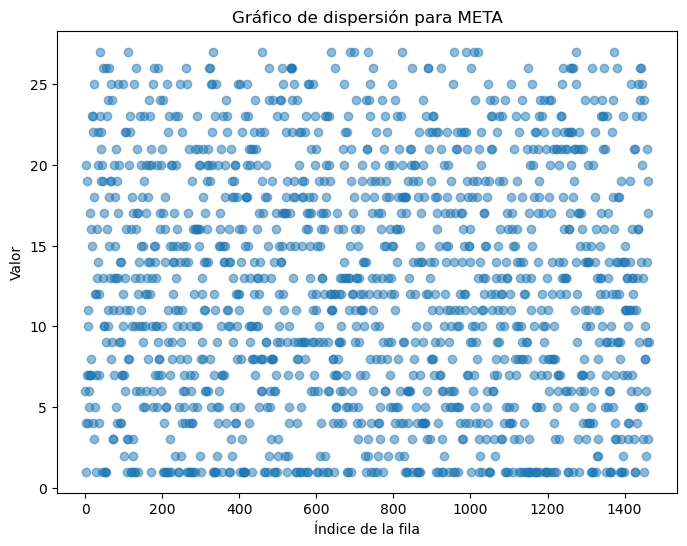

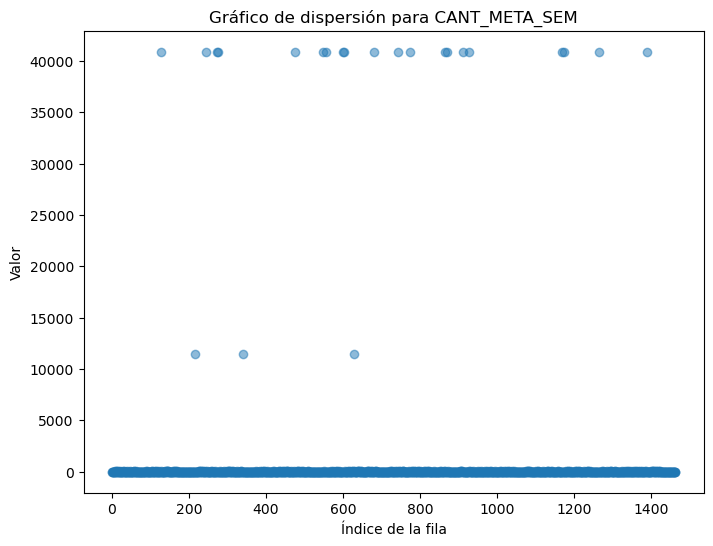

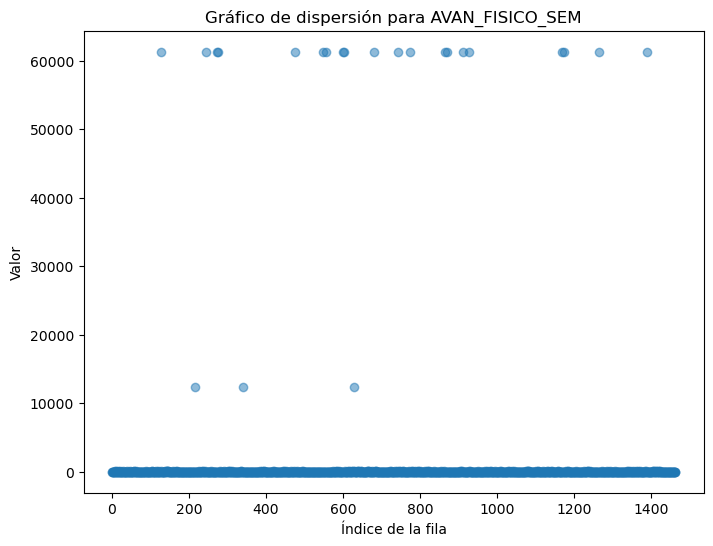

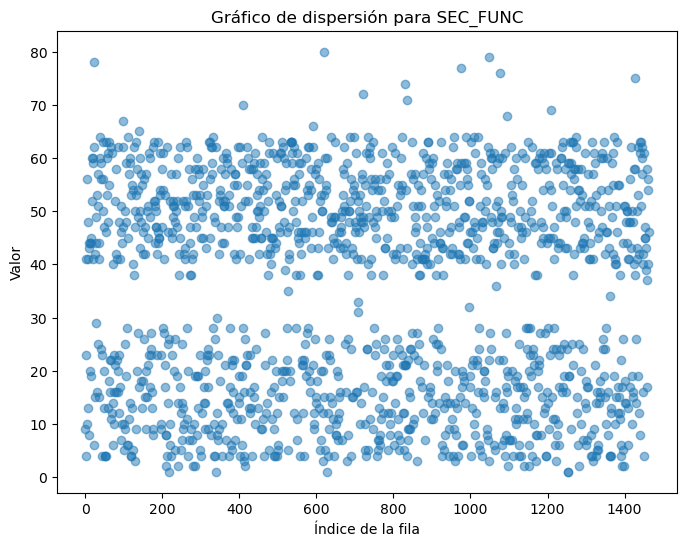

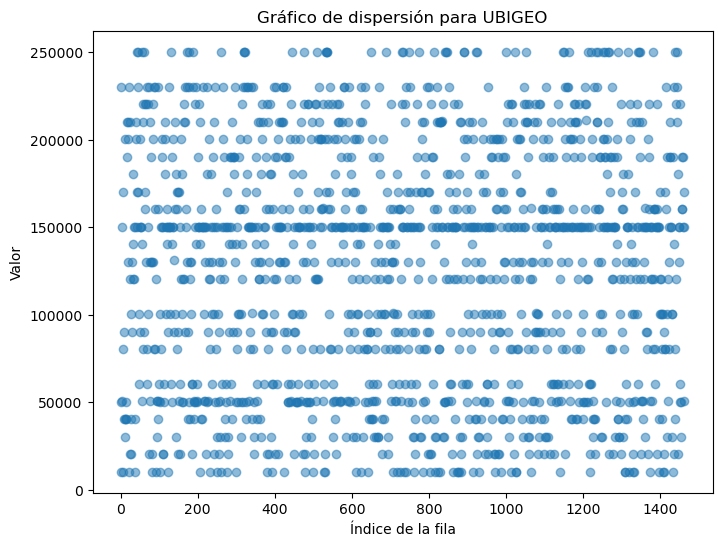

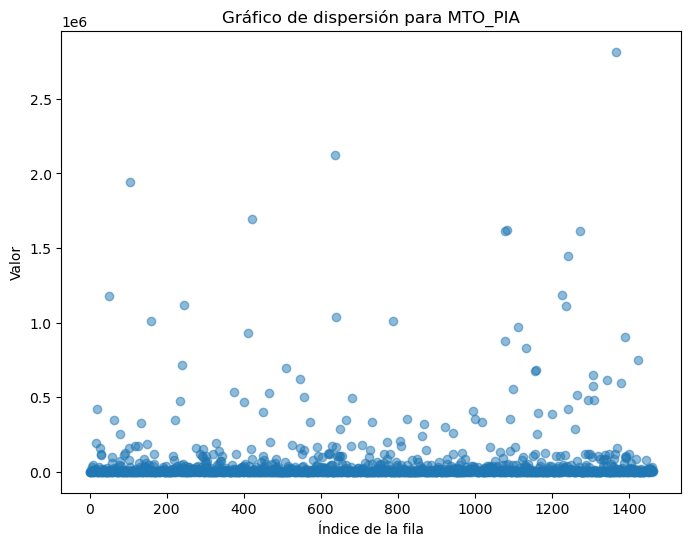

In [26]:
for columna in train_fff.columns:
    plt.figure(figsize=(8, 6))  # Tamaño de la figura
    plt.scatter(range(len(train_fff)), train_fff[columna], alpha=0.5)  
    plt.title(f'Gráfico de dispersión para {columna}')  
    plt.xlabel('Índice de la fila')  
    plt.ylabel('Valor')  
    plt.show()  

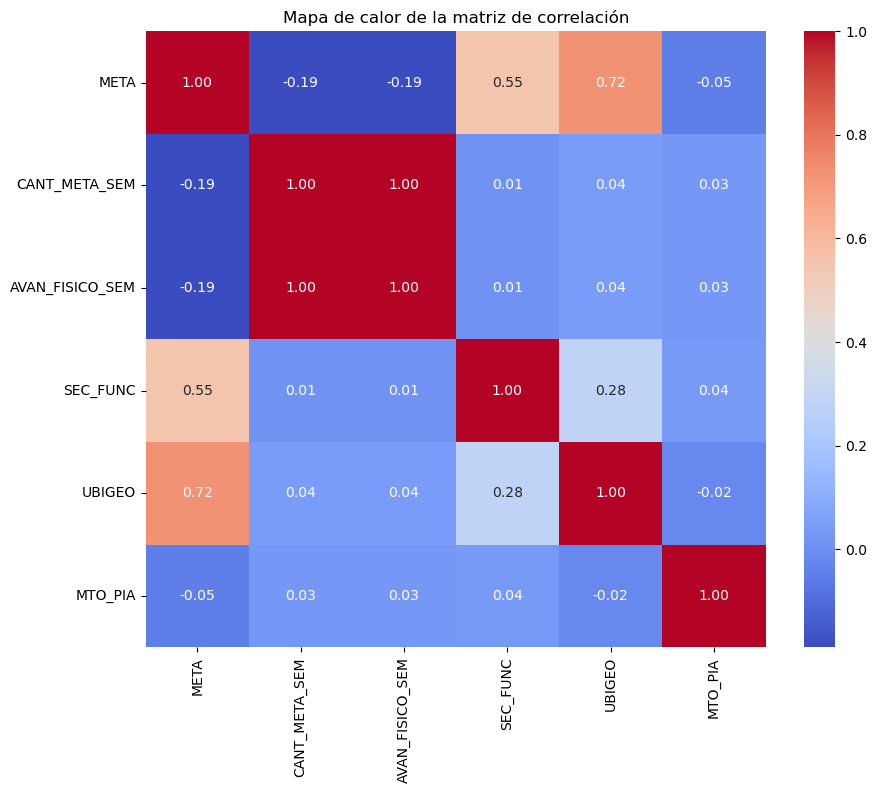

In [28]:
matriz_correlacion = train_fff.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(matriz_correlacion, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Mapa de calor de la matriz de correlación')
plt.show()